# Parameters tuning

In [1]:
%load_ext autoreload
%autoreload
#Imports
from KNeighbors import display_plot, sober_results

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler

In this section, we only change the values of the parameters related to the algorithm itself. Therefore, we stick to the same CSV file when running our tests, containing more samples than the one used in the first test (8000 lines).

##### Number of neighbors


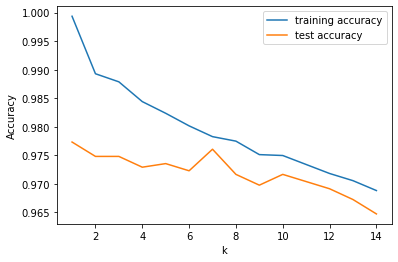

In [10]:
display_plot('../../dumps/various_sizes/8K.csv',0.20,15)

Once again, we can see that the best results are provided when setting the number of neighbors to 7. Case where n=1 is an overfitting.

#### Minkowsi metric

This is the power parameter for the Minkowski metric. When p=1, this is equivalent to using manhattan_distance(l1), and euliddean_distance(l2) for p=2. For arbitrary p, minkowski distance (l_p) is used.

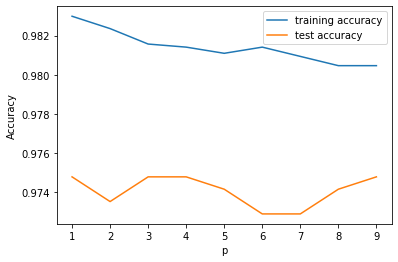

In [4]:
gt = pd.read_csv('../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

training_accuracy = [] 
test_accuracy = []
neighbors_settings = range(1, 10)
for p in neighbors_settings:
    clf = KNeighborsClassifier(p=p) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("p")
plt.legend()

Default value is p=2 which gives a worse score than manhattan distance (p=1), we should therefore keep l1 for further tests.

#### Test factor

In [4]:
for i in range(10,100,10):
    i=i/100
    print("Test size of %s :"% i)
    sober_results('../../dumps/various_sizes/8K.csv',i,6)

Test size of 0.1 :
Training set accuracy: 1.00
Test set accuracy: 0.99
Test size of 0.2 :
Training set accuracy: 1.00
Test set accuracy: 1.00
Test size of 0.3 :
Training set accuracy: 1.00
Test set accuracy: 0.99
Test size of 0.4 :
Training set accuracy: 0.99
Test set accuracy: 0.99
Test size of 0.5 :
Training set accuracy: 0.99
Test set accuracy: 0.99
Test size of 0.6 :
Training set accuracy: 0.99
Test set accuracy: 0.99
Test size of 0.7 :
Training set accuracy: 0.99
Test set accuracy: 0.99
Test size of 0.8 :
Training set accuracy: 0.99
Test set accuracy: 0.98
Test size of 0.9 :
Training set accuracy: 0.98
Test set accuracy: 0.98


#### Final choice

In [10]:
gt = pd.read_csv('../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [5]:
clf = KNeighborsClassifier(n_neighbors=7,p=1)
clf.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(clf.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(clf.score(data_test, target_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.977
